In [1]:
import pandas as pd
import psycopg2

In [60]:
DB_HOST = '89.145.163.87'
DB_PORT = 5432
DB_USERNAME = 'group11'
DB_PASSWORD = 'tsw2020'
DB_NAME = 'tweets'

In [61]:
def db_to_pandas(query):
    """ Query database to a Pandas DF"""
    conn = psycopg2.connect(host=DB_HOST, port=DB_PORT, database=DB_NAME, user=DB_USERNAME, password=DB_PASSWORD)
    cur = conn.cursor()
    
    df = pd.read_sql_query(query, conn)
    print(df.info)
    
    cur.close()
    conn.close()
    
    return df

In [131]:
sql_query = """
SELECT tweet_id, concepts, tweet_body->>'created_at' as created_at
FROM tweet
WHERE location_id LIKE 'germany%'
AND concepts IS NOT NULL;
"""

df_from_db = db_to_pandas(sql_query)

<bound method DataFrame.info of                    tweet_id  \
0       1236555130352340992   
1       1236555068062777345   
2       1236087509135785984   
3       1236228948138381312   
4       1236304776142499840   
...                     ...   
133341  1233374329351610371   
133342  1233376020004311041   
133343  1233367005262163968   
133344  1233211956049391616   
133345  1233246389385039872   

                                                 concepts  \
0       [{'percentageOfSecondRank': 0.0048286635161054...   
1       [{'percentageOfSecondRank': 0.0003671934018937...   
2       [{'percentageOfSecondRank': 0.0403526535470470...   
3       [{'percentageOfSecondRank': 0.0, 'offset': 0, ...   
4       [{'percentageOfSecondRank': 0.5970834895188047...   
...                                                   ...   
133341  [{'percentageOfSecondRank': 0.0, 'offset': 13,...   
133342  [{'percentageOfSecondRank': 0.0, 'offset': 13,...   
133343  [{'percentageOfSecondRank': 0.0, 'offs

In [183]:
# convert to timestamps to days
df_from_db.date = pd.to_datetime(df_from_db['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_from_db.date = df_from_db.date.dt.normalize()

df_from_db.info

<bound method DataFrame.info of                    tweet_id  \
0       1236555130352340992   
1       1236555068062777345   
2       1236087509135785984   
3       1236228948138381312   
4       1236304776142499840   
...                     ...   
133341  1233374329351610371   
133342  1233376020004311041   
133343  1233367005262163968   
133344  1233211956049391616   
133345  1233246389385039872   

                                                 concepts  \
0       [{'percentageOfSecondRank': 0.0048286635161054...   
1       [{'percentageOfSecondRank': 0.0003671934018937...   
2       [{'percentageOfSecondRank': 0.0403526535470470...   
3       [{'percentageOfSecondRank': 0.0, 'offset': 0, ...   
4       [{'percentageOfSecondRank': 0.5970834895188047...   
...                                                   ...   
133341  [{'percentageOfSecondRank': 0.0, 'offset': 13,...   
133342  [{'percentageOfSecondRank': 0.0, 'offset': 13,...   
133343  [{'percentageOfSecondRank': 0.0, 'offs

In [212]:
a = df_from_db.explode('concepts')
concept_df = (a.assign(concepts = a['concepts'].str.get('surfaceForm'))\
              .groupby(['date','concepts'])['concepts'].count().reset_index(name='count'))
print(concept_df)

            date       concepts  count
0     2020-02-25            !!!      4
1     2020-02-25  28 days later      1
2     2020-02-25           A 25      1
3     2020-02-25            ABC      1
4     2020-02-25             AI      1
...          ...            ...    ...
17980 2020-03-08            wei      1
17981 2020-03-08           word      1
17982 2020-03-08     worst-case      1
17983 2020-03-08     Österreich      1
17984 2020-03-08              😂      7

[17985 rows x 3 columns]


In [251]:
top_concepts = concept_df.groupby(['concepts']).agg({'count':sum}).sort_values(['count'], ascending=False)
top_concepts.info

<bound method DataFrame.info of                      count
concepts                  
coronavirus          45245
Coronavirus          41523
do                   13058
china                12469
China                 6856
...                    ...
VerkehrsRundschau        1
Verkehrsbetrieb          1
Infektionsforschung      1
Indus                    1
Pendelzug                1

[7735 rows x 1 columns]>

In [257]:
for i, c in top_concepts.iterrows():
    print(c)

count    45245
Name: coronavirus, dtype: int64
count    41523
Name: Coronavirus, dtype: int64
count    13058
Name: do, dtype: int64
count    12469
Name: china, dtype: int64
count    6856
Name: China, dtype: int64
count    6751
Name: Deutschland, dtype: int64
count    6224
Name: del, dtype: int64
count    4533
Name: un, dtype: int64
count    4092
Name: Berlin, dtype: int64
count    3657
Name: Corona, dtype: int64
count    3065
Name: primer, dtype: int64
count    2490
Name: CoronaVirus, dtype: int64
count    2399
Name: amp, dtype: int64
count    2337
Name: Italien, dtype: int64
count    1979
Name: Virus, dtype: int64
count    1679
Name: Infektion, dtype: int64
count    1617
Name: NRW, dtype: int64
count    1486
Name: via, dtype: int64
count    1468
Name: tun, dtype: int64
count    1448
Name: Jens Spahn, dtype: int64
count    1434
Name: Iran, dtype: int64
count    1324
Name: Südkorea, dtype: int64
count    1305
Name: Europa, dtype: int64
count    1257
Name: Hongkong, dtype: int64
count   

Name: Immunsystem, dtype: int64
count    72
Name: Kreis, dtype: int64
count    72
Name: Pence, dtype: int64
count    72
Name: Börse, dtype: int64
count    72
Name: Potsdam, dtype: int64
count    72
Name: Ryanair, dtype: int64
count    71
Name: Download, dtype: int64
count    71
Name: Fuck, dtype: int64
count    71
Name: prise, dtype: int64
count    71
Name: erk, dtype: int64
count    71
Name: Friedrich, dtype: int64
count    71
Name: Son, dtype: int64
count    70
Name: CORONAVIRUS, dtype: int64
count    70
Name: Africa, dtype: int64
count    70
Name: NHS, dtype: int64
count    70
Name: once, dtype: int64
count    70
Name: korea, dtype: int64
count    70
Name: cuatro, dtype: int64
count    69
Name: Pressekodex, dtype: int64
count    69
Name: Moskau, dtype: int64
count    69
Name: Karneval, dtype: int64
count    69
Name: Freiburg, dtype: int64
count    69
Name: Krisenmanagement, dtype: int64
count    69
Name: Apotheke, dtype: int64
count    69
Name: krn, dtype: int64
count    68
Name: di

Name: ILI, dtype: int64
count    26
Name: Edeka, dtype: int64
count    25
Name: Aachen, dtype: int64
count    25
Name: да, dtype: int64
count    25
Name: nouveau centre, dtype: int64
count    25
Name: Milch, dtype: int64
count    25
Name: Social Media, dtype: int64
count    25
Name: Weltbank, dtype: int64
count    25
Name: Genforscher, dtype: int64
count    25
Name: Bevölkerungsschutz, dtype: int64
count    25
Name: Karnevalssitzung, dtype: int64
count    25
Name: survival, dtype: int64
count    25
Name: Hypochonder, dtype: int64
count    25
Name: AIDS, dtype: int64
count    25
Name: Smart, dtype: int64
count    25
Name: WTF, dtype: int64
count    25
Name: Diabetes, dtype: int64
count    25
Name: Xi Jinping, dtype: int64
count    25
Name: Gewerkschaft, dtype: int64
count    25
Name: columna, dtype: int64
count    25
Name: Lukas, dtype: int64
count    24
Name: Letalität, dtype: int64
count    24
Name: page, dtype: int64
count    24
Name: Landgericht, dtype: int64
count    24
Name: Mannh

Name: Nied, dtype: int64
count    13
Name: Spanische Grippe, dtype: int64
count    13
Name: Reißleine, dtype: int64
count    13
Name: is, dtype: int64
count    13
Name: Religion, dtype: int64
count    13
Name: iran, dtype: int64
count    13
Name: Fliegen, dtype: int64
count    13
Name: Kochshow, dtype: int64
count    13
Name: Papageien, dtype: int64
count    13
Name: Doctors, dtype: int64
count    13
Name: Duden, dtype: int64
count    13
Name: Threads, dtype: int64
count    13
Name: Tim Cook, dtype: int64
count    13
Name: Taxi, dtype: int64
count    13
Name: Uden, dtype: int64
count    13
Name: Landkreis Rottweil, dtype: int64
count    13
Name: Unternehmer, dtype: int64
count    13
Name: Bahrain, dtype: int64
count    13
Name: Unterhaching, dtype: int64
count    13
Name: Bundesgesundheitsministerium, dtype: int64
count    13
Name: Köln-Wahn, dtype: int64
count    13
Name: Eigentumswohnung, dtype: int64
count    13
Name: UKE, dtype: int64
count    13
Name: Sylt, dtype: int64
count    1

Name: reset, dtype: int64
count    9
Name: imagine, dtype: int64
count    9
Name: Gescher, dtype: int64
count    9
Name: Halsschmerzen, dtype: int64
count    9
Name: Mutation, dtype: int64
count    9
Name: Brexit, dtype: int64
count    9
Name: ESA, dtype: int64
count    9
Name: Genius, dtype: int64
count    9
Name: ER, dtype: int64
count    9
Name: Schauspieler, dtype: int64
count    9
Name: proponent, dtype: int64
count    9
Name: Briefing, dtype: int64
count    9
Name: Moers, dtype: int64
count    9
Name: Infektionsschutz, dtype: int64
count    9
Name: closures, dtype: int64
count    8
Name: transplantation, dtype: int64
count    8
Name: Gentechnik, dtype: int64
count    8
Name: Haferflocken, dtype: int64
count    8
Name: wuhan, dtype: int64
count    8
Name: Helikopter-Eltern, dtype: int64
count    8
Name: Viruserkrankung, dtype: int64
count    8
Name: Ostalbkreis, dtype: int64
count    8
Name: don't panic, dtype: int64
count    8
Name: Außenhandel, dtype: int64
count    8
Name: diez

Name: I/O, dtype: int64
count    6
Name: Prag, dtype: int64
count    6
Name: Handschuh, dtype: int64
count    6
Name: Ans, dtype: int64
count    6
Name: Missouri, dtype: int64
count    6
Name: Mellendorf, dtype: int64
count    6
Name: Armin Laschet, dtype: int64
count    6
Name: neoliberal, dtype: int64
count    6
Name: olma, dtype: int64
count    6
Name: Menschlichkeit, dtype: int64
count    6
Name: Vilshofen, dtype: int64
count    6
Name: Luftlinie, dtype: int64
count    6
Name: moinmoin, dtype: int64
count    6
Name: loose, dtype: int64
count    6
Name: Pisa, dtype: int64
count    6
Name: Wolfsburg, dtype: int64
count    6
Name: Die Apothekerin, dtype: int64
count    6
Name: Zunft, dtype: int64
count    6
Name: Schach, dtype: int64
count    6
Name: Deutschen Roten Kreuzes, dtype: int64
count    6
Name: Mach, dtype: int64
count    6
Name: H-Milch, dtype: int64
count    6
Name: Celle, dtype: int64
count    6
Name: Paris Saint-Germain, dtype: int64
count    6
Name: vista, dtype: int64


Name: guess?, dtype: int64
count    5
Name: guarda, dtype: int64
count    5
Name: EUROPA, dtype: int64
count    5
Name: Edmund Stoiber, dtype: int64
count    5
Name: gl, dtype: int64
count    5
Name: gi, dtype: int64
count    5
Name: geg, dtype: int64
count    5
Name: Energiewirtschaft, dtype: int64
count    5
Name: GPU, dtype: int64
count    5
Name: GLOBAL NEWS, dtype: int64
count    5
Name: Eosinophilen Granulozyten, dtype: int64
count    5
Name: forecast, dtype: int64
count    5
Name: ADAC, dtype: int64
count    5
Name: cli, dtype: int64
count    5
Name: Erdoğan, dtype: int64
count    5
Name: Erdöl, dtype: int64
count    5
Name: shame, dtype: int64
count    5
Name: merak, dtype: int64
count    5
Name: Heroldsberg, dtype: int64
count    5
Name: turnaround, dtype: int64
count    5
Name: Bayerische Rote Kreuz, dtype: int64
count    5
Name: Bahnhof, dtype: int64
count    5
Name: Analysis, dtype: int64
count    5
Name: Herdenverhalten, dtype: int64
count    5
Name: usar, dtype: int64
cou

Name: asozial, dtype: int64
count    3
Name: lotto, dtype: int64
count    3
Name: Workshop, dtype: int64
count    3
Name: GfK, dtype: int64
count    3
Name: Rap, dtype: int64
count    3
Name: Mallorca, dtype: int64
count    3
Name: WG, dtype: int64
count    3
Name: VDMA, dtype: int64
count    3
Name: Senior, dtype: int64
count    3
Name: Hausarrest, dtype: int64
count    3
Name: Venice, dtype: int64
count    3
Name: Hardware, dtype: int64
count    3
Name: Län, dtype: int64
count    3
Name: tabu, dtype: int64
count    3
Name: Maryland, dtype: int64
count    3
Name: marca, dtype: int64
count    3
Name: Bean, dtype: int64
count    3
Name: Jahresabschlüsse, dtype: int64
count    3
Name: DAS!, dtype: int64
count    3
Name: Livia, dtype: int64
count    3
Name: Reading, dtype: int64
count    3
Name: ine, dtype: int64
count    3
Name: Liverpool, dtype: int64
count    3
Name: Jahresurlaub, dtype: int64
count    3
Name: Massenpanik, dtype: int64
count    3
Name: Realtime, dtype: int64
count    3

Name: Thai, dtype: int64
count    3
Name: Föderalismus, dtype: int64
count    3
Name: Entwicklungsländer, dtype: int64
count    3
Name: Umweltschutz, dtype: int64
count    3
Name: freien Fall, dtype: int64
count    3
Name: KBV, dtype: int64
count    3
Name: Asiat, dtype: int64
count    3
Name: Asiate, dtype: int64
count    3
Name: England, dtype: int64
count    3
Name: Königswinter, dtype: int64
count    3
Name: Köpenick, dtype: int64
count    3
Name: vieta, dtype: int64
count    3
Name: Teil 1, dtype: int64
count    3
Name: Engel, dtype: int64
count    3
Name: fundraising, dtype: int64
count    3
Name: Künstlicher Intelligenz, dtype: int64
count    3
Name: Papier, dtype: int64
count    3
Name: 15min, dtype: int64
count    3
Name: Premier League, dtype: int64
count    3
Name: Energie, dtype: int64
count    3
Name: Endzeit, dtype: int64
count    3
Name: Webex, dtype: int64
count    3
Name: Paranoia, dtype: int64
count    3
Name: Enzkreis, dtype: int64
count    3
Name: Wilmersdorf, dtype

Name: silly, dtype: int64
count    2
Name: ZERO, dtype: int64
count    2
Name: World Music, dtype: int64
count    2
Name: soga, dtype: int64
count    2
Name: YONEX, dtype: int64
count    2
Name: Radrennen, dtype: int64
count    2
Name: welle, dtype: int64
count    2
Name: Völkerrecht, dtype: int64
count    2
Name: ups, dtype: int64
count    2
Name: Reformhaus, dtype: int64
count    2
Name: Polyvinylpolypyrrolidon, dtype: int64
count    2
Name: the National Gallery, dtype: int64
count    2
Name: werfen, dtype: int64
count    2
Name: staat, dtype: int64
count    2
Name: spotify, dtype: int64
count    2
Name: Regierungsbezirk Münster, dtype: int64
count    2
Name: Xinhua, dtype: int64
count    2
Name: spectators, dtype: int64
count    2
Name: winzig, dtype: int64
count    2
Name: 28 Days Later, dtype: int64
count    2
Name: Rachen, dtype: int64
count    2
Name: soziale Medien, dtype: int64
count    2
Name: wirbel, dtype: int64
count    2
Name: wodka, dtype: int64
count    2
Name: umg, dty

Name: Verbrauchermesse, dtype: int64
count    2
Name: Schwarzwald, dtype: int64
count    2
Name: masern, dtype: int64
count    2
Name: likelihood, dtype: int64
count    2
Name: apotheke, dtype: int64
count    2
Name: medico international, dtype: int64
count    2
Name: Schuster, dtype: int64
count    2
Name: meininger, dtype: int64
count    2
Name: meningitis, dtype: int64
count    2
Name: Schuh, dtype: int64
count    2
Name: Schmallenberg, dtype: int64
count    2
Name: Schloss Neuschwanstein, dtype: int64
count    2
Name: Schleswig, dtype: int64
count    2
Name: Seehäfen, dtype: int64
count    2
Name: Seide, dtype: int64
count    2
Name: arthritis, dtype: int64
count    2
Name: Sekt, dtype: int64
count    2
Name: autopsie, dtype: int64
count    2
Name: atemschutz, dtype: int64
count    2
Name: lipid, dtype: int64
count    2
Name: listing, dtype: int64
count    2
Name: Venetien, dtype: int64
count    2
Name: lithium, dtype: int64
count    2
Name: livestream, dtype: int64
count    2
Name

Name: Focus Online, dtype: int64
count    2
Name: Generalstreik, dtype: int64
count    2
Name: Klassentreffen, dtype: int64
count    2
Name: Für Sie, dtype: int64
count    2
Name: Automobilzulieferer, dtype: int64
count    2
Name: Patent, dtype: int64
count    2
Name: Frühjahrsklassiker, dtype: int64
count    2
Name: Fondsmanager, dtype: int64
count    2
Name: Korrespondent, dtype: int64
count    2
Name: Passau, dtype: int64
count    2
Name: Automation, dtype: int64
count    2
Name: Jurong, dtype: int64
count    2
Name: Der Idiot, dtype: int64
count    2
Name: Paulaner, dtype: int64
count    2
Name: Appel, dtype: int64
count    2
Name: Ahwaz, dtype: int64
count    2
Name: Pegida, dtype: int64
count    2
Name: PCR, dtype: int64
count    2
Name: BCE, dtype: int64
count    2
Name: BBK, dtype: int64
count    2
Name: Notfallambulanz, dtype: int64
count    2
Name: Kabbalah, dtype: int64
count    2
Name: Flick, dtype: int64
count    2
Name: Nous, dtype: int64
count    2
Name: Angorakaninchen,

Name: inbound, dtype: int64
count    1
Name: kil, dtype: int64
count    1
Name: idiocracy, dtype: int64
count    1
Name: kinda, dtype: int64
count    1
Name: ibiza, dtype: int64
count    1
Name: iTunes, dtype: int64
count    1
Name: kiss, dtype: int64
count    1
Name: iPad, dtype: int64
count    1
Name: iOS, dtype: int64
count    1
Name: iBo, dtype: int64
count    1
Name: Donny, dtype: int64
count    1
Name: Doomsday, dtype: int64
count    1
Name: Deutsche Diabetes Gesellschaft, dtype: int64
count    1
Name: Deutsche Börse, dtype: int64
count    1
Name: händeschütteln, dtype: int64
count    1
Name: händedesinfektion, dtype: int64
count    1
Name: Doppelmoral, dtype: int64
count    1
Name: Dorfladen, dtype: int64
count    1
Name: hyperventiliert, dtype: int64
count    1
Name: Ala, dtype: int64
count    1
Name: hyperloop, dtype: int64
count    1
Name: Doro, dtype: int64
count    1
Name: klimaerwärmung, dtype: int64
count    1
Name: Designer, dtype: int64
count    1
Name: Dosenbier, dtype

Name: Experteninterview, dtype: int64
count    1
Name: FACE, dtype: int64
count    1
Name: espresso, dtype: int64
count    1
Name: F2, dtype: int64
count    1
Name: F.A.Z., dtype: int64
count    1
Name: ADC, dtype: int64
count    1
Name: ethanol, dtype: int64
count    1
Name: Eén, dtype: int64
count    1
Name: Exporteur, dtype: int64
count    1
Name: eva, dtype: int64
count    1
Name: evangelikale, dtype: int64
count    1
Name: Exklusion, dtype: int64
count    1
Name: EuropaLeague, dtype: int64
count    1
Name: Exhibitions, dtype: int64
count    1
Name: Eurovision Song Contest, dtype: int64
count    1
Name: expo, dtype: int64
count    1
Name: Eurotour, dtype: int64
count    1
Name: exponentiellem Wachstum, dtype: int64
count    1
Name: Europäischen Parlaments, dtype: int64
count    1
Name: Europameisterschaft, dtype: int64
count    1
Name: face to face, dtype: int64
count    1
Name: fachkräftemangel, dtype: int64
count    1
Name: Europakarte, dtype: int64
count    1
Name: FAS, dtype: i

Name: würfeln, dtype: int64
count    1
Name: Anker, dtype: int64
count    1
Name: 12 Monkeys, dtype: int64
count    1
Name: you tube, dtype: int64
count    1
Name: zeven, dtype: int64
count    1
Name: And one, dtype: int64
count    1
Name: Animation, dtype: int64
count    1
Name: Anhalter Bahnhof, dtype: int64
count    1
Name: zionist, dtype: int64
count    1
Name: zoom, dtype: int64
count    1
Name: Angelus, dtype: int64
count    1
Name: Angela merkel, dtype: int64
count    1
Name: zwin, dtype: int64
count    1
Name: Andromeda, dtype: int64
count    1
Name: °F, dtype: int64
count    1
Name: Android, dtype: int64
count    1
Name: vertrag, dtype: int64
count    1
Name: verso, dtype: int64
count    1
Name: verl, dtype: int64
count    1
Name: verkehrssicherheit, dtype: int64
count    1
Name: tomatenmark, dtype: int64
count    1
Name: BMG, dtype: int64
count    1
Name: BJP, dtype: int64
count    1
Name: touring, dtype: int64
count    1
Name: BIP, dtype: int64
count    1
Name: towns, dtype:

Name: Bod, dtype: int64
count    1
Name: Bockenheim, dtype: int64
count    1
Name: Bobingen, dtype: int64
count    1
Name: saarland, dtype: int64
count    1
Name: saat, dtype: int64
count    1
Name: Bob Geldof, dtype: int64
count    1
Name: Blähungen, dtype: int64
count    1
Name: sai, dtype: int64
count    1
Name: Blutplasma, dtype: int64
count    1
Name: sail, dtype: int64
count    1
Name: sair, dtype: int64
count    1
Name: sais, dtype: int64
count    1
Name: saison, dtype: int64
count    1
Name: Blutdruck, dtype: int64
count    1
Name: samo, dtype: int64
count    1
Name: sana, dtype: int64
count    1
Name: Bluff, dtype: int64
count    1
Name: rtl2, dtype: int64
count    1
Name: rotwein, dtype: int64
count    1
Name: Bokeh, dtype: int64
count    1
Name: Bouches-du-Rhône, dtype: int64
count    1
Name: rem, dtype: int64
count    1
Name: reporter, dtype: int64
count    1
Name: repositories, dtype: int64
count    1
Name: republik, dtype: int64
count    1
Name: Bozen, dtype: int64
count 

Name: Landkreis Erlangen, dtype: int64
count    1
Name: Sweatshirt, dtype: int64
count    1
Name: Sweeney Todd, dtype: int64
count    1
Name: Swift, dtype: int64
count    1
Name: Swing, dtype: int64
count    1
Name: Landkreis Emmendingen, dtype: int64
count    1
Name: Landkreis Ebersberg, dtype: int64
count    1
Name: Landkreis Celle, dtype: int64
count    1
Name: Sylvia, dtype: int64
count    1
Name: Landkreis Breisgau-Hochschwarzwald, dtype: int64
count    1
Name: Landkreis Bayreuth, dtype: int64
count    1
Name: Syndikus, dtype: int64
count    1
Name: Synonym, dtype: int64
count    1
Name: TOMs, dtype: int64
count    1
Name: LLamasoft, dtype: int64
count    1
Name: TSC, dtype: int64
count    1
Name: TSG, dtype: int64
count    1
Name: Tastatur, dtype: int64
count    1
Name: Künstliche Intelligenz, dtype: int64
count    1
Name: Taus, dtype: int64
count    1
Name: Tauschhandel, dtype: int64
count    1
Name: Kümmersbruck, dtype: int64
count    1
Name: Teaser, dtype: int64
count    1
Nam

Name: SEOUL, dtype: int64
count    1
Name: Millionenstädte, dtype: int64
count    1
Name: Sabine Bätzing-Lichtenthäler, dtype: int64
count    1
Name: Milchzucker, dtype: int64
count    1
Name: Milchstraße, dtype: int64
count    1
Name: Mikrotechnik, dtype: int64
count    1
Name: Mikrobiologin, dtype: int64
count    1
Name: Sahara, dtype: int64
count    1
Name: Mikrobiologe, dtype: int64
count    1
Name: Saint Gobain, dtype: int64
count    1
Name: Miesmuscheln, dtype: int64
count    1
Name: Salesforce, dtype: int64
count    1
Name: Microsoft Edge, dtype: int64
count    1
Name: Mick Schumacher, dtype: int64
count    1
Name: Michael Schanze, dtype: int64
count    1
Name: Michael Müller, dtype: int64
count    1
Name: Michael Ludwig, dtype: int64
count    1
Name: Mhm, dtype: int64
count    1
Name: San Antonio, dtype: int64
count    1
Name: San Jose, dtype: int64
count    1
Name: Meu, dtype: int64
count    1
Name: Mettwurst, dtype: int64
count    1
Name: San Siro, dtype: int64
count    1
Nam

Name: bakterien, dtype: int64
count    1
Name: ballistic, dtype: int64
count    1
Name: Georg Seeßlen, dtype: int64
count    1
Name: bana, dtype: int64
count    1
Name: bank run, dtype: int64
count    1
Name: Georg Pahl, dtype: int64
count    1
Name: Geologie, dtype: int64
count    1
Name: Geodaten, dtype: int64
count    1
Name: Genom, dtype: int64
count    1
Name: barrio, dtype: int64
count    1
Name: bartalk, dtype: int64
count    1
Name: batalha, dtype: int64
count    1
Name: bath, dtype: int64
count    1
Name: bayerisch, dtype: int64
count    1
Name: biohazard, dtype: int64
count    1
Name: Gehörlos, dtype: int64
count    1
Name: Gehirnentzündung, dtype: int64
count    1
Name: Gefahrenabwehr, dtype: int64
count    1
Name: britischer, dtype: int64
count    1
Name: buchreport, dtype: int64
count    1
Name: bui, dtype: int64
count    1
Name: bullshitbingo, dtype: int64
count    1
Name: Galaxie, dtype: int64
count    1
Name: bun, dtype: int64
count    1
Name: buna, dtype: int64
count  

Name: IM, dtype: int64
count    1
Name: Vivian, dtype: int64
count    1
Name: Vladimir, dtype: int64
count    1
Name: Vlog, dtype: int64
count    1
Name: IKB, dtype: int64
count    1
Name: IG, dtype: int64
count    1
Name: Vogtland, dtype: int64
count    1
Name: Voice of America, dtype: int64
count    1
Name: Voldemort, dtype: int64
count    1
Name: WDR2, dtype: int64
count    1
Name: AdBlock Plus, dtype: int64
count    1
Name: Vincent, dtype: int64
count    1
Name: Hungersnot, dtype: int64
count    1
Name: Horizont, dtype: int64
count    1
Name: Warschauer Straße, dtype: int64
count    1
Name: Horas, dtype: int64
count    1
Name: Honni, dtype: int64
count    1
Name: Adobe, dtype: int64
count    1
Name: Wasserwirtschaft, dtype: int64
count    1
Name: Hong Sang-soo, dtype: int64
count    1
Name: Wave, dtype: int64
count    1
Name: Way of life, dtype: int64
count    1
Name: Webcam, dtype: int64
count    1
Name: Homeschooling, dtype: int64
count    1
Name: Homburg, dtype: int64
count    1

In [261]:
stop = ('coronavirus', 'Coronavirus', 'Corona', 'CoronaVirus', 'do', 'amp', 'Deutschland', 'via', 'tun', 'primer', 'un', 'del')
relevant_top = concept_df[~concept_df.concepts.isin(stop)]
relevant_top.groupby(['concepts']).agg({'count':sum}).sort_values(['count'], ascending=False)

,count
concepts,
china,12469
China,6856
Berlin,4092
Italien,2337
Virus,1979
...,...
Faschings,1
Viruskrankheit,1
McAfee,1


In [338]:
interesting = ['Italien', 'China', 'Jens Spahn', 
               'Desinfektionsmittel', 'Mundschutz',
               'Robert-Koch-Institut', 'Iran', 'Italy'
              ]

interesting_df = concept_df[concept_df.concepts.isin(interesting)]
interesting_df.info

<bound method DataFrame.info of             date              concepts  count
102   2020-02-25                 China    677
122   2020-02-25   Desinfektionsmittel      4
267   2020-02-25                  Iran    122
270   2020-02-25               Italien    332
274   2020-02-25            Jens Spahn     33
...          ...                   ...    ...
17557 2020-03-08                  Iran     10
17561 2020-03-08               Italien    195
17564 2020-03-08            Jens Spahn     27
17628 2020-03-08            Mundschutz      1
17710 2020-03-08  Robert-Koch-Institut     27

[90 rows x 3 columns]>

In [394]:
sql_query = """
SELECT tweet_body->>'created_at' as created_at
FROM tweet
WHERE location_id LIKE 'germany%';
"""

all_tweets = db_to_pandas(sql_query)
all_tweets['date'] = pd.to_datetime(all_tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
all_tweets['date'] = all_tweets.date.dt.normalize()

total_tweets = all_tweets['date'].value_counts()
total_tweets = total_tweets.to_frame().reset_index().rename(columns={'index': 'date', 'date': 'count'})
total_tweets.info
#total_tweets = total_tweets.reset_index()


total_tweets

<bound method DataFrame.info of                             created_at
0       Sun Mar 08 07:31:31 +0000 2020
1       Sun Mar 08 07:31:16 +0000 2020
2       Sat Mar 07 00:33:22 +0000 2020
3       Sat Mar 07 09:55:23 +0000 2020
4       Sat Mar 07 14:56:42 +0000 2020
...                                ...
150977  Fri Feb 28 12:52:09 +0000 2020
150978  Fri Feb 28 12:58:52 +0000 2020
150979  Fri Feb 28 12:23:03 +0000 2020
150980  Fri Feb 28 02:06:56 +0000 2020
150981  Fri Feb 28 04:23:46 +0000 2020

[150982 rows x 1 columns]>


,date,count
0,2020-02-29,20059
1,2020-02-28,16211
2,2020-03-05,13646
3,2020-03-02,13445
4,2020-03-03,13372
5,2020-02-27,11940
6,2020-03-04,11200
7,2020-03-01,10835
8,2020-03-06,10745
9,2020-03-07,10092


In [52]:
!pip install seaborn

    100% |████████████████████████████████| 225kB 864kB/s ta 0:00:01
    100% |████████████████████████████████| 26.0MB 60kB/s  eta 0:00:01    68% |██████████████████████          | 17.9MB 14.5MB/s eta 0:00:01


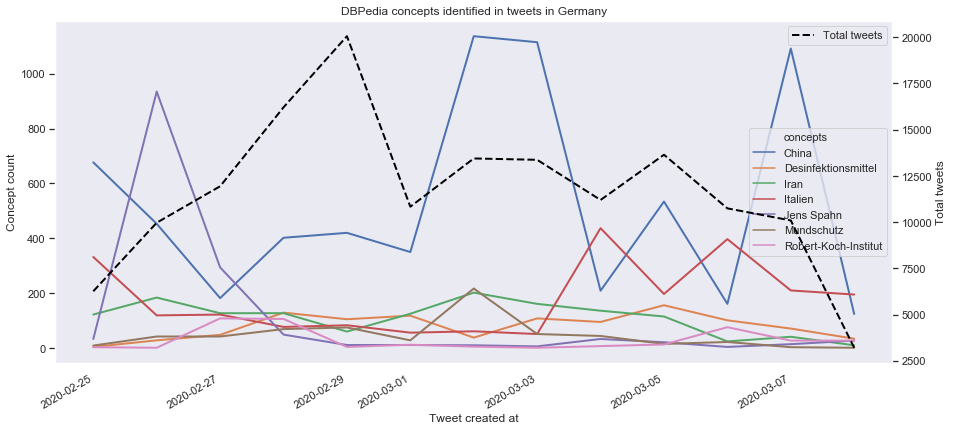

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

sns.set(style="dark")
plt.title("DBPedia concepts identified in tweets in Germany")

#sns.set_context("talk")

# set size of figure
rcParams['figure.figsize'] = 15,7

# first axis
plot_df = interesting_df
ax1 = sns.lineplot(data=plot_df, x='date', y='count', hue='concepts', linewidth=2)
ax1.set(xlabel='Tweet created at', ylabel='Concept count')

# second axis
ax2 = plt.twinx()
sns.lineplot(data=total_tweets, x='date', y='count', color="black", ax=ax2, linewidth=2)
ax2.grid(False)
ax2.set(ylabel='Total tweets')
ax2.lines[0].set_linestyle("--")

plt.legend(labels=['Total tweets'])

plt.gcf().autofmt_xdate()